<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/banner_dl.png">


<center><h1 style="font-size:2em;color:#2467C0"> Tarea
 </h1></center>


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import cv2

<div class="alert alert-success">
   
**Parte 1**
    
Utilizando 5 imágenes de películas o series (como el del ejemplo). Realizar las siguientes actividades 
    
* Para cada una de las imágenes muestre los recuadros de los rostros, ojos y sonrisas de las personas que ahí aparezcan, usando el algoritmo Haar Cascade.

* Para cada una de las imágenes muestre los recuadros de los rostros, usando RNCs.
    
</div> 

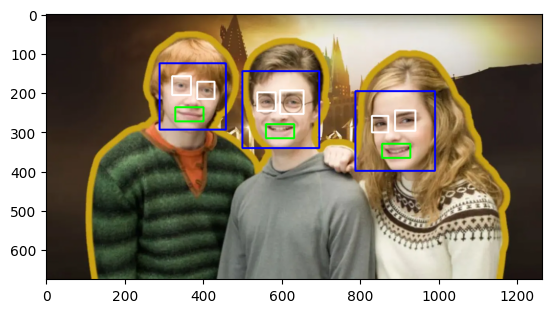

In [8]:
img = cv.imread('figuras/harry_potter.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gris = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

detector_rostros = cv.CascadeClassifier('datos/haarcascade_frontalface_default.xml')
rostros = detector_rostros.detectMultiScale(img_gris, scaleFactor=1.1, minNeighbors=20)

detector_sonrisas = cv.CascadeClassifier('datos/haarcascade_smile.xml')
sonrisas = detector_sonrisas.detectMultiScale(img_gris, scaleFactor=2, minNeighbors=15)

detector_ojos = cv.CascadeClassifier('datos/haarcascade_eye.xml')
ojos = detector_ojos.detectMultiScale(img_gris, scaleFactor=1.03, minNeighbors=20)

for (x, y, w, h) in rostros:
    cv.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 4)
    for (x_s, y_s, w_s, h_s) in sonrisas:
        if x_s > x and x_s+w_s < x+w and y_s > y and y_s+h_s < y+h:
            cv.rectangle(img, (x_s, y_s), (x_s+w_s, y_s+h_s), (0, 255, 0), 4)
    for (x_e, y_e, w_e, h_e) in ojos:
        if x_e > x and x_e+w_e < x+w and y_e > y and y_e+h_e < y+h:
            cv.rectangle(img, (x_e, y_e), (x_e+w_e, y_e+h_e), (255, 255, 255), 4)
            
plt.imshow(img)
plt.show()

675   1264


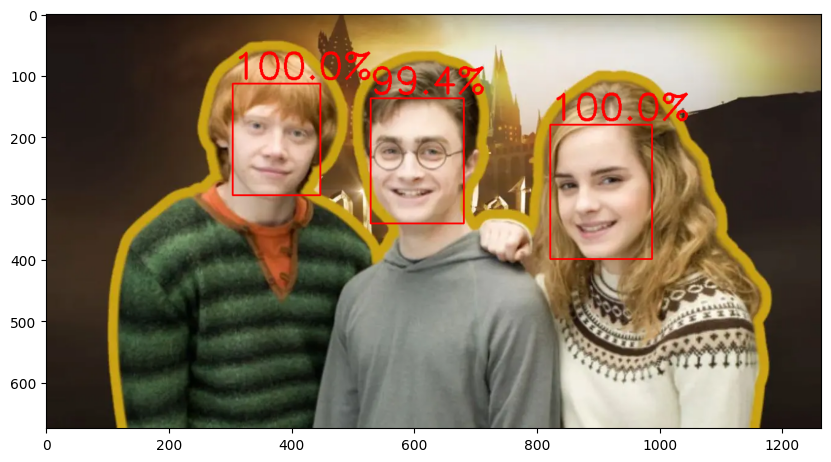

In [9]:
pb = "datos/opencv_face_detector_uint8.pb"
pbtxt = "datos/opencv_face_detector.pbtxt"
net = cv2.dnn.readNetFromTensorflow(pb, pbtxt)

img = cv2.imread('figuras/harry_potter.jpeg')
(h, w) = img.shape[:2]
print(h, ' ', w)

blob = cv2.dnn.blobFromImage(cv2.resize(img, (300, 300)),
                             scalefactor=1.0,
                             size=(300, 300),
                             mean=(104.0, 177.0, 123.0),  # BGR
                             swapRB=False, crop=False)

net.setInput(blob)

detections = net.forward()

for i in range(detections.shape[2]):
    conf = detections[0][0][i][2]
    if conf > 0.5:
        x1, y1, x2, y2 = (detections[0][0] [i] [3:7] * [w, h, w, h]).astype(int)
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
        cv2.putText(img, f"{conf*100:.1f}%", (x1, y1-8),
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (0,0,255), 3)
        
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,8))
plt.imshow(img_rgb)
plt.show()

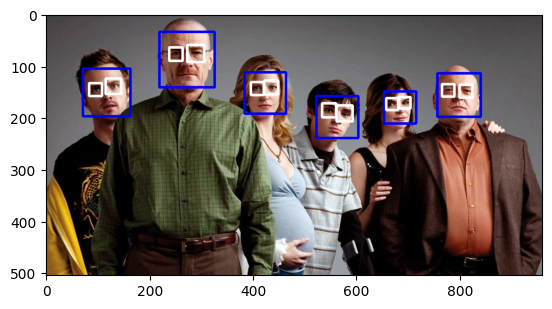

In [10]:
img = cv.imread('figuras/breaking-bad.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gris = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

detector_rostros = cv.CascadeClassifier('datos/haarcascade_frontalface_default.xml')
rostros = detector_rostros.detectMultiScale(img_gris, scaleFactor=1.1, minNeighbors=20)

detector_sonrisas = cv.CascadeClassifier('datos/haarcascade_smile.xml')
sonrisas = detector_sonrisas.detectMultiScale(img_gris, scaleFactor=2, minNeighbors=15)

detector_ojos = cv.CascadeClassifier('datos/haarcascade_eye.xml')
ojos = detector_ojos.detectMultiScale(img_gris, scaleFactor=1.002, minNeighbors=20)

for (x, y, w, h) in rostros:
    cv.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 4)
    for (x_s, y_s, w_s, h_s) in sonrisas:
        if x_s > x and x_s+w_s < x+w and y_s > y and y_s+h_s < y+h:
            cv.rectangle(img, (x_s, y_s), (x_s+w_s, y_s+h_s), (0, 255, 0), 4)
    for (x_e, y_e, w_e, h_e) in ojos:
        if x_e > x and x_e+w_e < x+w and y_e > y and y_e+h_e < y+h:
            cv.rectangle(img, (x_e, y_e), (x_e+w_e, y_e+h_e), (255, 255, 255), 4)
            
plt.imshow(img)
plt.show()

504   960


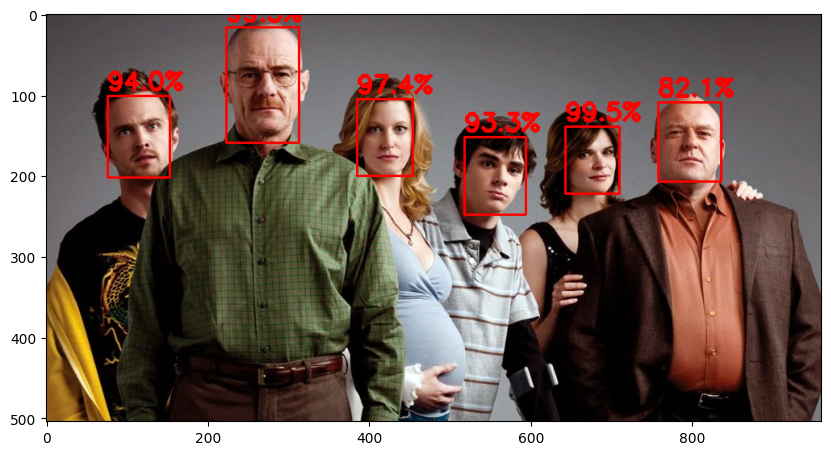

In [11]:
pb = "datos/opencv_face_detector_uint8.pb"
pbtxt = "datos/opencv_face_detector.pbtxt"
net = cv2.dnn.readNetFromTensorflow(pb, pbtxt)

img = cv2.imread('figuras/breaking-bad.jpg')
(h, w) = img.shape[:2]
print(h, ' ', w)

blob = cv2.dnn.blobFromImage(cv2.resize(img, (300, 300)),
                             scalefactor=1.0,
                             size=(300, 300),
                             mean=(104.0, 177.0, 123.0),  # BGR
                             swapRB=False, crop=False)

net.setInput(blob)

detections = net.forward()

for i in range(detections.shape[2]):
    conf = detections[0][0][i][2]
    if conf > 0.5:
        x1, y1, x2, y2 = (detections[0][0] [i] [3:7] * [w, h, w, h]).astype(int)
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
        cv2.putText(img, f"{conf*100:.1f}%", (x1, y1-8),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 3)
        
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,8))
plt.imshow(img_rgb)
plt.show()

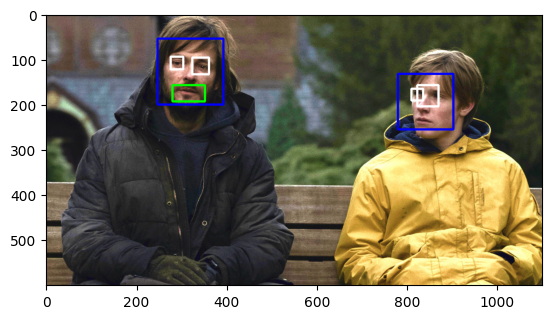

In [12]:
img = cv.imread('figuras/dark_serie.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gris = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

detector_rostros = cv.CascadeClassifier('datos/haarcascade_frontalface_default.xml')
rostros = detector_rostros.detectMultiScale(img_gris, scaleFactor=1.085, minNeighbors=20)

detector_sonrisas = cv.CascadeClassifier('datos/haarcascade_smile.xml')
sonrisas = detector_sonrisas.detectMultiScale(img_gris, scaleFactor=2, minNeighbors=15)

detector_ojos = cv.CascadeClassifier('datos/haarcascade_eye.xml')
ojos = detector_ojos.detectMultiScale(img_gris, scaleFactor=1.006, minNeighbors=15)

for (x, y, w, h) in rostros:
    cv.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 4)
    for (x_s, y_s, w_s, h_s) in sonrisas:
        if x_s > x and x_s+w_s < x+w and y_s > y and y_s+h_s < y+h:
            cv.rectangle(img, (x_s, y_s), (x_s+w_s, y_s+h_s), (0, 255, 0), 4)
    for (x_e, y_e, w_e, h_e) in ojos:
        if x_e > x and x_e+w_e < x+w and y_e > y and y_e+h_e < y+h:
            cv.rectangle(img, (x_e, y_e), (x_e+w_e, y_e+h_e), (255, 255, 255), 4)
            
plt.imshow(img)
plt.show()

600   1100


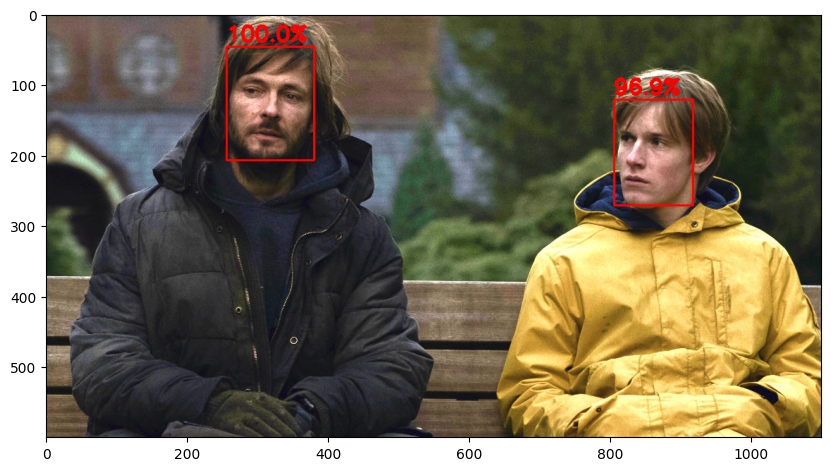

In [13]:
pb = "datos/opencv_face_detector_uint8.pb"
pbtxt = "datos/opencv_face_detector.pbtxt"
net = cv2.dnn.readNetFromTensorflow(pb, pbtxt)

img = cv2.imread('figuras/dark_serie.jpg')
(h, w) = img.shape[:2]
print(h, ' ', w)

blob = cv2.dnn.blobFromImage(cv2.resize(img, (300, 300)),
                             scalefactor=1.0,
                             size=(300, 300),
                             mean=(104.0, 177.0, 123.0),  # BGR
                             swapRB=False, crop=False)

net.setInput(blob)

detections = net.forward()

for i in range(detections.shape[2]):
    conf = detections[0][0][i][2]
    if conf > 0.5:
        x1, y1, x2, y2 = (detections[0][0] [i] [3:7] * [w, h, w, h]).astype(int)
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
        cv2.putText(img, f"{conf*100:.1f}%", (x1, y1-8),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 3)
        
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,8))
plt.imshow(img_rgb)
plt.show()

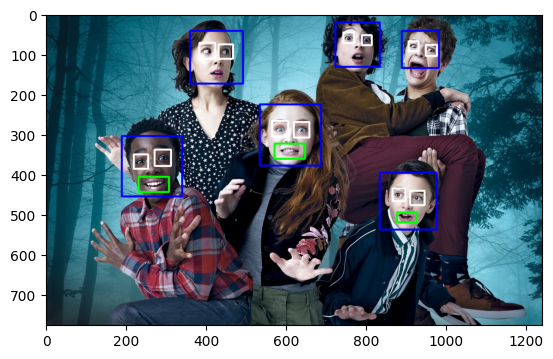

In [14]:
img = cv.imread('figuras/stranger_things.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gris = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

detector_rostros = cv.CascadeClassifier('datos/haarcascade_frontalface_default.xml')
rostros = detector_rostros.detectMultiScale(img_gris, scaleFactor=1.03, minNeighbors=20)

detector_sonrisas = cv.CascadeClassifier('datos/haarcascade_smile.xml')
sonrisas = detector_sonrisas.detectMultiScale(img_gris, scaleFactor=1.1, minNeighbors=20)

detector_ojos = cv.CascadeClassifier('datos/haarcascade_eye.xml')
ojos = detector_ojos.detectMultiScale(img_gris, scaleFactor=1.09, minNeighbors=20)

for (x, y, w, h) in rostros:
    cv.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 4)
    for (x_s, y_s, w_s, h_s) in sonrisas:
        if x_s > x and x_s+w_s < x+w and y_s > y and y_s+h_s < y+h:
            cv.rectangle(img, (x_s, y_s), (x_s+w_s, y_s+h_s), (0, 255, 0), 4)
    for (x_e, y_e, w_e, h_e) in ojos:
        if x_e > x and x_e+w_e < x+w and y_e > y and y_e+h_e < y+h:
            cv.rectangle(img, (x_e, y_e), (x_e+w_e, y_e+h_e), (255, 255, 255), 4)
            
plt.imshow(img)
plt.show()

775   1240


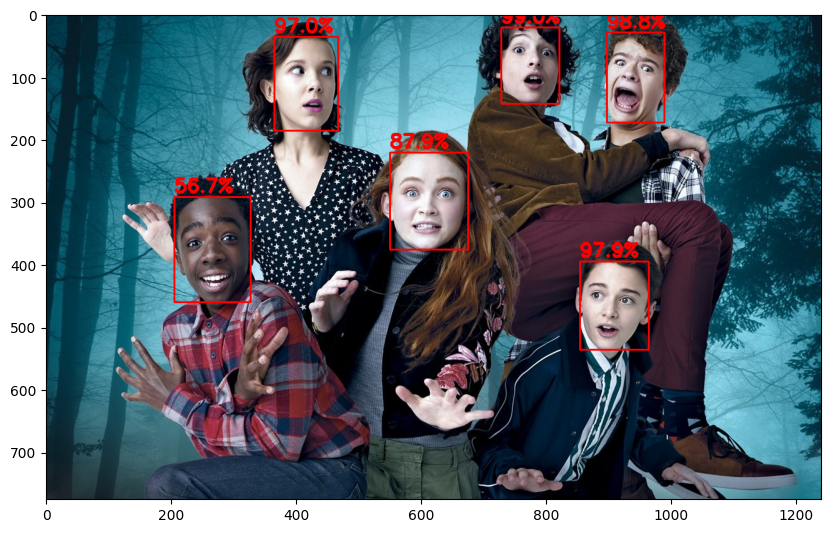

In [15]:
pb = "datos/opencv_face_detector_uint8.pb"
pbtxt = "datos/opencv_face_detector.pbtxt"
net = cv2.dnn.readNetFromTensorflow(pb, pbtxt)

img = cv2.imread('figuras/stranger_things.jpg')
(h, w) = img.shape[:2]
print(h, ' ', w)

blob = cv2.dnn.blobFromImage(cv2.resize(img, (300, 300)),
                             scalefactor=1.0,
                             size=(300, 300),
                             mean=(104.0, 177.0, 123.0),  # BGR
                             swapRB=False, crop=False)

net.setInput(blob)

detections = net.forward()

for i in range(detections.shape[2]):
    conf = detections[0][0][i][2]
    if conf > 0.5:
        x1, y1, x2, y2 = (detections[0][0] [i] [3:7] * [w, h, w, h]).astype(int)
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
        cv2.putText(img, f"{conf*100:.1f}%", (x1, y1-8),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 3)
        
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,8))
plt.imshow(img_rgb)
plt.show()

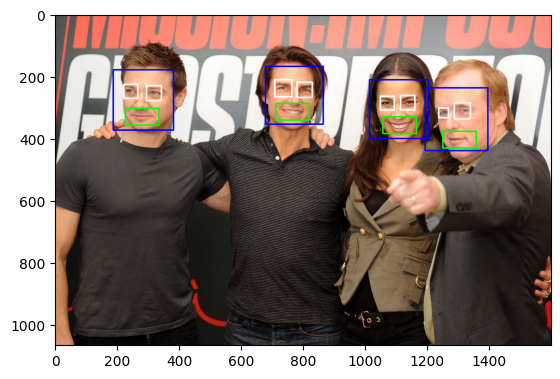

In [16]:
img = cv.imread('figuras/mision_imposible.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gris = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

detector_rostros = cv.CascadeClassifier('datos/haarcascade_frontalface_default.xml')
rostros = detector_rostros.detectMultiScale(img_gris, scaleFactor=1.1, minNeighbors=20)

detector_sonrisas = cv.CascadeClassifier('datos/haarcascade_smile.xml')
sonrisas = detector_sonrisas.detectMultiScale(img_gris, scaleFactor=3, minNeighbors=20)

detector_ojos = cv.CascadeClassifier('datos/haarcascade_eye.xml')
ojos = detector_ojos.detectMultiScale(img_gris, scaleFactor=1.1, minNeighbors=20)

for (x, y, w, h) in rostros:
    cv.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 4)
    for (x_s, y_s, w_s, h_s) in sonrisas:
        if x_s > x and x_s+w_s < x+w and y_s > y and y_s+h_s < y+h:
            cv.rectangle(img, (x_s, y_s), (x_s+w_s, y_s+h_s), (0, 255, 0), 4)
    for (x_e, y_e, w_e, h_e) in ojos:
        if x_e > x and x_e+w_e < x+w and y_e > y and y_e+h_e < y+h:
            cv.rectangle(img, (x_e, y_e), (x_e+w_e, y_e+h_e), (255, 255, 255), 4)
            
plt.imshow(img)
plt.show()

1065   1600


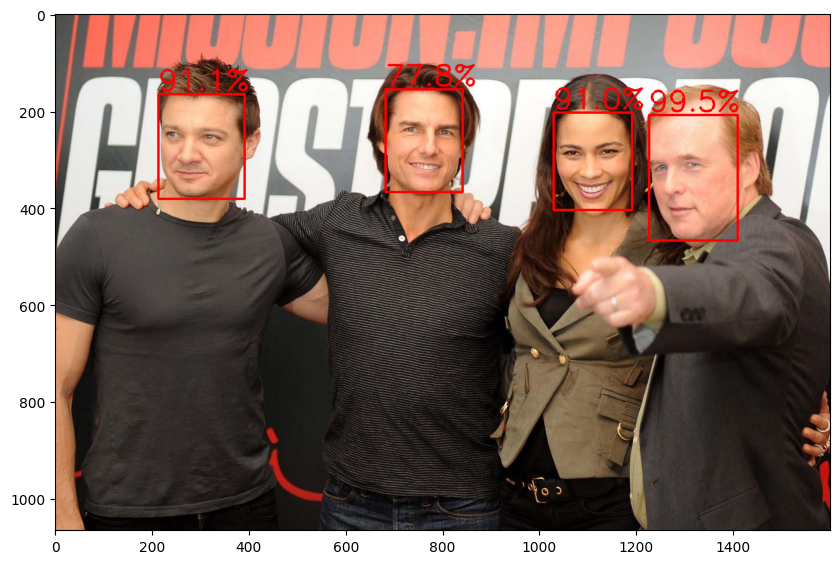

In [17]:
pb = "datos/opencv_face_detector_uint8.pb"
pbtxt = "datos/opencv_face_detector.pbtxt"
net = cv2.dnn.readNetFromTensorflow(pb, pbtxt)

img = cv2.imread('figuras/mision_imposible.jpg')
(h, w) = img.shape[:2]
print(h, ' ', w)

blob = cv2.dnn.blobFromImage(cv2.resize(img, (300, 300)),
                             scalefactor=1.0,
                             size=(300, 300),
                             mean=(104.0, 177.0, 123.0),  # BGR
                             swapRB=False, crop=False)

net.setInput(blob)

detections = net.forward()

for i in range(detections.shape[2]):
    conf = detections[0][0][i][2]
    if conf > 0.5:
        x1, y1, x2, y2 = (detections[0][0] [i] [3:7] * [w, h, w, h]).astype(int)
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 3)
        cv2.putText(img, f"{conf*100:.1f}%", (x1, y1-8),
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (0,0,255),4)
        
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,8))
plt.imshow(img_rgb)
plt.show()

<div class="alert alert-success">
   
**Parte 2**
    
Utilizando 5 imágenes de Google Street View muestre la deteccion de los altos,  usando el algoritmo Haar Cascade. Evaluar cual de los dos archivos de deteccion funciona mejor :
    
    * stopsign_classifier.xml
    * Stopsign_HAAR_19Stages.xml.

    
</div> 

<td><img src="figuras/altos.png" align="middle" style="width:850px;"/></td>


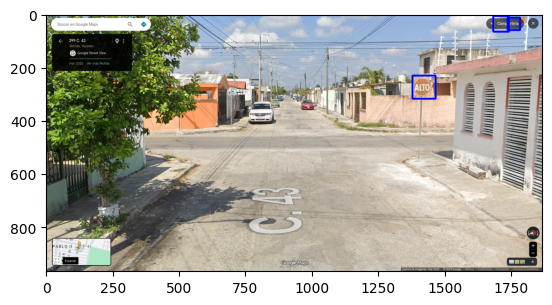

In [18]:
img = cv.imread('figuras/google1.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gris = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

detector_altos = cv.CascadeClassifier('datos/stopsign_classifier.xml')
altos = detector_altos.detectMultiScale(img_gris, scaleFactor=1.09, minNeighbors=20)

for (x, y, w, h) in altos:
    cv.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 5)
 
plt.imshow(img)
plt.show()

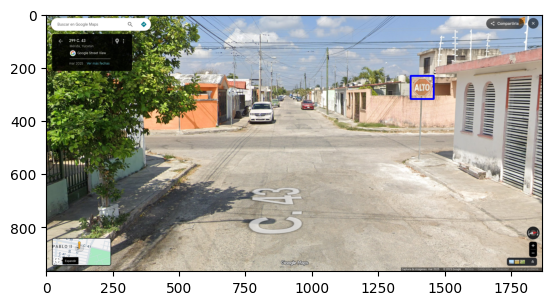

In [19]:
img = cv.imread('figuras/google1.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gris = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

detector_altos = cv.CascadeClassifier('datos/Stopsign_HAAR_19Stages.xml')
altos = detector_altos.detectMultiScale(img_gris, scaleFactor=1.04, minNeighbors=20)

for (x, y, w, h) in altos:
    cv.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 5)
 
plt.imshow(img)
plt.show()

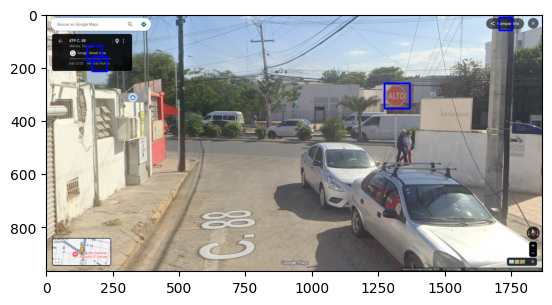

In [20]:
img = cv.imread('figuras/google2.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gris = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

detector_altos = cv.CascadeClassifier('datos/stopsign_classifier.xml')
altos = detector_altos.detectMultiScale(img_gris, scaleFactor=1.2, minNeighbors=20)

for (x, y, w, h) in altos:
    cv.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 5)
 
plt.imshow(img)
plt.show()

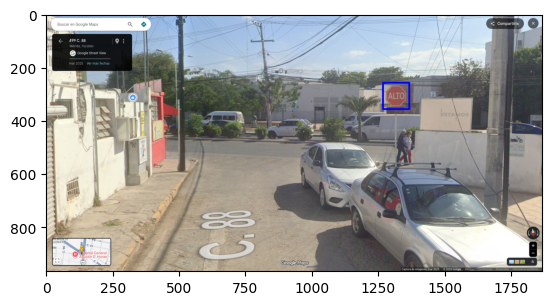

In [21]:
img = cv.imread('figuras/google2.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gris = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

detector_altos = cv.CascadeClassifier('datos/Stopsign_HAAR_19Stages.xml')
altos = detector_altos.detectMultiScale(img_gris, scaleFactor=1.02, minNeighbors=20)

for (x, y, w, h) in altos:
    cv.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 5)
 
plt.imshow(img)
plt.show()

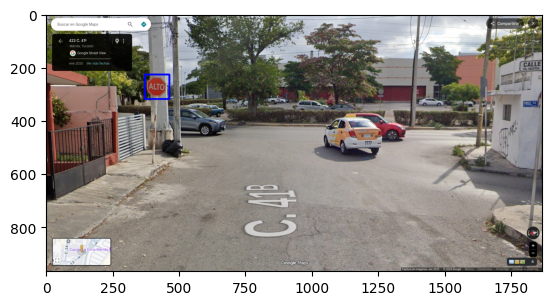

In [22]:
img = cv.imread('figuras/google3.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gris = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

detector_altos = cv.CascadeClassifier('datos/stopsign_classifier.xml')
altos = detector_altos.detectMultiScale(img_gris, scaleFactor=1.3, minNeighbors=20)

for (x, y, w, h) in altos:
    cv.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 5)
 
plt.imshow(img)
plt.show()

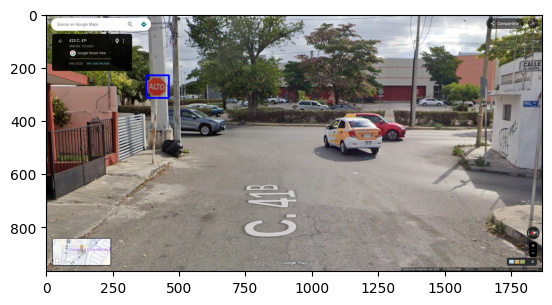

In [23]:
img = cv.imread('figuras/google3.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gris = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

detector_altos = cv.CascadeClassifier('datos/Stopsign_HAAR_19Stages.xml')
altos = detector_altos.detectMultiScale(img_gris, scaleFactor=1.02, minNeighbors=20)

for (x, y, w, h) in altos:
    cv.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 5)
 
plt.imshow(img)
plt.show()

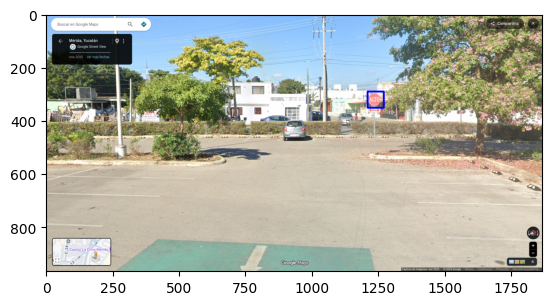

In [24]:
img = cv.imread('figuras/google4.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gris = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

detector_altos = cv.CascadeClassifier('datos/stopsign_classifier.xml')
altos = detector_altos.detectMultiScale(img_gris, scaleFactor=1.13, minNeighbors=20)

for (x, y, w, h) in altos:
    cv.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 5)
 
plt.imshow(img)
plt.show()

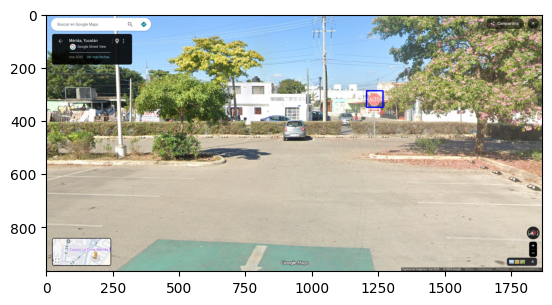

In [25]:
img = cv.imread('figuras/google4.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gris = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

detector_altos = cv.CascadeClassifier('datos/Stopsign_HAAR_19Stages.xml')
altos = detector_altos.detectMultiScale(img_gris, scaleFactor=1.015, minNeighbors=20)

for (x, y, w, h) in altos:
    cv.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 4)
 
plt.imshow(img)
plt.show()

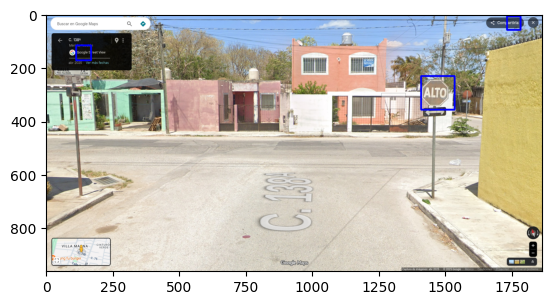

In [26]:
img = cv.imread('figuras/google5.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gris = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

detector_altos = cv.CascadeClassifier('datos/stopsign_classifier.xml')
altos = detector_altos.detectMultiScale(img_gris, scaleFactor=1.09, minNeighbors=15)

for (x, y, w, h) in altos:
    cv.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 5)
 
plt.imshow(img)
plt.show()

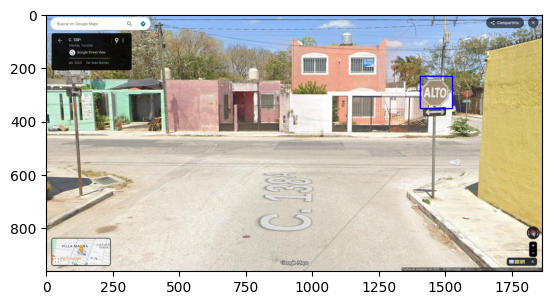

In [27]:
img = cv.imread('figuras/google5.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gris = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

detector_altos = cv.CascadeClassifier('datos/Stopsign_HAAR_19Stages.xml')
altos = detector_altos.detectMultiScale(img_gris, scaleFactor=1.012, minNeighbors=20)

for (x, y, w, h) in altos:
    cv.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 4)
 
plt.imshow(img)
plt.show()

## `Stopsign_HAAR_19Stages`

Funciona mejor en la detección que `stopsign_classifier.xml`, ya que este último parece devolver la detección con más ruido.  
Sin embargo, `stopsign_classifier.xml` funciona mejor en cuanto a velocidad.


<div class="alert alert-success">
   
**Parte 3**
    
Crear una imagen que tenga el siguiente texto

* Linea 1: Nombre y apellido
* Linea 2: Carrera y semestre
* Linea 3: Lugar de nacimiento

Utilizar pytesseract para detectar el texto
</div> 



Texto detectado:
JOSE MANUEL AQUE GONZALEZ
Ingenieria en Sistemas Computacionales

Mérida, Yucatan



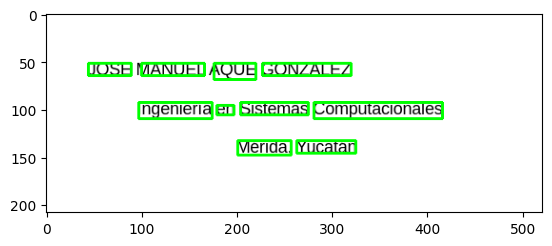

In [28]:
import pytesseract

img = cv.imread("figuras/texto.png")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gris = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

texto = pytesseract.image_to_string(img_gris, lang="eng")  
datos = pytesseract.image_to_data(img_gris, lang="eng", output_type=pytesseract.Output.DICT)

for i in range(len(datos['text'])):
    if int(datos['conf'][i]) > 60:  # confianza mayor a 60% 
        x, y, w, h = datos['left'][i], datos['top'][i], datos['width'][i], datos['height'][i]
        cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

print("Texto detectado:")
print(texto)
plt.imshow(img)
plt.show()